In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()

    return dataset, training_dataset

In [4]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [5]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [6]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [7]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [8]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Temp1 Multi - Contamination Level
dataset_names = [
    'Idaweb Swiss Temperature Multi TS8',
    'Idaweb Swiss Temperature Multi TS8 CL10',
    'Idaweb Swiss Temperature Multi TS8 CL15',
    'Idaweb Swiss Temperature Multi TS8 CL20',
    'Idaweb Swiss Temperature Multi TS8 CL25'
]
dimension = np.array([50, 100, 150, 200, 250])


In [10]:
# Cont Level - RPCA
# Results array [nmi, rmse, f1]

r_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)   

In [11]:
# Cont Level - HISTOGRAM
# Results array [nmi, rmse, f1]

h_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)  

In [12]:
# Cont Level - CLUSTER
# Results array [nmi, rmse, f1]

c_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)  

In [13]:
# Cont Level - SVM
# Results array [nmi, rmse, f1]

s_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)    

In [14]:
# Cont Level - ISOLATION FOREST
# Results array [nmi, rmse, f1]

i_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [15]:
scores = [{ 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [16]:
print(scores)

[{'title': 'RPCA', 'scores': array([[0.59 , 0.021, 0.734],
       [0.46 , 0.054, 0.63 ],
       [0.374, 0.092, 0.553],
       [0.333, 0.128, 0.522],
       [0.312, 0.162, 0.515]])}, {'title': 'Histogram', 'scores': array([[0.025, 0.101, 0.179],
       [0.008, 0.147, 0.15 ],
       [0.002, 0.194, 0.134],
       [0.   , 0.241, 0.117],
       [0.   , 0.287, 0.1  ]])}, {'title': 'Cluster', 'scores': array([[0.434, 0.03 , 0.571],
       [0.356, 0.066, 0.507],
       [0.252, 0.113, 0.389],
       [0.257, 0.146, 0.416],
       [0.277, 0.173, 0.464]])}, {'title': 'SVM', 'scores': array([[0.184, 0.062, 0.436],
       [0.145, 0.1  , 0.419],
       [0.092, 0.146, 0.348],
       [0.061, 0.193, 0.298],
       [0.066, 0.229, 0.316]])}, {'title': 'Isolation Forest', 'scores': array([[0.024, 0.119, 0.179],
       [0.011, 0.163, 0.181],
       [0.007, 0.205, 0.19 ],
       [0.003, 0.25 , 0.178],
       [0.005, 0.285, 0.206]])}]


In [3]:
scores = [{'title': 'RPCA', 'scores': np.array([[0.59 , 0.021, 0.734],
       [0.46 , 0.054, 0.63 ],
       [0.374, 0.092, 0.553],
       [0.333, 0.128, 0.522],
       [0.312, 0.162, 0.515]])}, {'title': 'Histogram', 'scores': np.array([[0.025, 0.101, 0.179],
       [0.008, 0.147, 0.15 ],
       [0.002, 0.194, 0.134],
       [0.   , 0.241, 0.117],
       [0.   , 0.287, 0.1  ]])}, {'title': 'Cluster', 'scores': np.array([[0.434, 0.03 , 0.571],
       [0.356, 0.066, 0.507],
       [0.252, 0.113, 0.389],
       [0.257, 0.146, 0.416],
       [0.277, 0.173, 0.464]])}, {'title': 'SVM', 'scores': np.array([[0.184, 0.062, 0.436],
       [0.145, 0.1  , 0.419],
       [0.092, 0.146, 0.348],
       [0.061, 0.193, 0.298],
       [0.066, 0.229, 0.316]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.024, 0.119, 0.179],
       [0.011, 0.163, 0.181],
       [0.007, 0.205, 0.19 ],
       [0.003, 0.25 , 0.178],
       [0.005, 0.285, 0.206]])}]

In [4]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [5]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [6]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

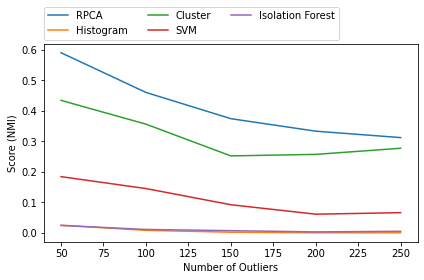

In [7]:
generate_nmi_line_chart(dimension, scores)

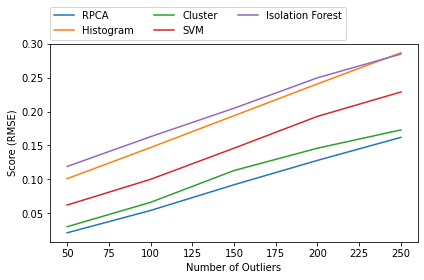

In [8]:
generate_rmse_line_chart(dimension, scores)

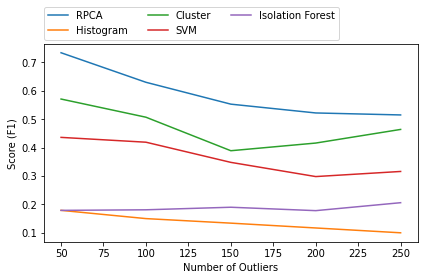

In [9]:
generate_f1_line_chart(dimension, scores)